## Import Libraries

In [74]:
from sklearn.datasets import load_breast_cancer

import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
cancer_data = load_breast_cancer()

In [3]:
cancer_df = pd.DataFrame(cancer_data['data'])
cancer_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
cancer_df.columns=cancer_data.feature_names

In [6]:
cancer_df['target']=cancer_data['target']

In [7]:
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Data Understanding

In [8]:
cancer_df.shape

(569, 31)

In [9]:
cancer_df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [10]:
cancer_df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

### Model Building

In [12]:
X=cancer_df.drop('target',axis=1)

In [14]:
y=cancer_df[['target']]

In [16]:
y.value_counts()

target
1         357
0         212
dtype: int64

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

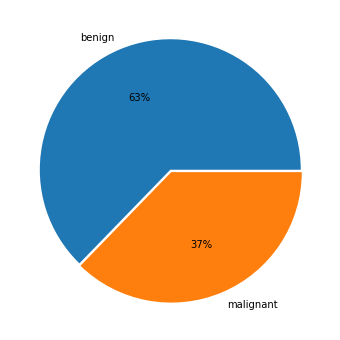

In [49]:
plt.figure(figsize=(6,6))
plt.pie(y.value_counts(),explode=[0,0.02],labels=['benign','malignant'],autopct='%1.f%%')
plt.show()

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12,shuffle=True,stratify=y)

Stratify will be used by the train_test_split() function to ensure that both the train and test sets have the proportion of 
examples in each class that is present in the provided “y” array

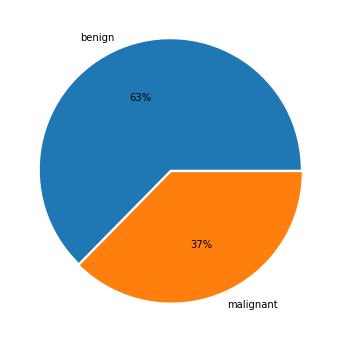

In [50]:
plt.figure(figsize=(6,6))
plt.pie(y_train.value_counts(),explode=[0,0.02],labels=['benign','malignant'],autopct='%1.0f%%')
plt.show()

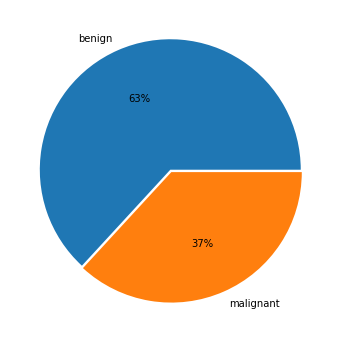

In [51]:
plt.figure(figsize=(6,6))
plt.pie(y_test.value_counts(),explode=[0,0.02],labels=['benign','malignant'],autopct='%1.0f%%')
plt.show()

In [52]:
X_train.shape,X_test.shape

((455, 30), (114, 30))

In [53]:
y_train.shape,y_test.shape

((455, 1), (114, 1))

### Model Training

In [56]:
adaboost_classifier=AdaBoostClassifier()

In [57]:
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier()

### Model Testing

#### Training Data

In [81]:
y_pred_train=adaboost_classifier.predict(X_train)

In [82]:
print(accuracy_score(y_train,y_pred_train))
print(confusion_matrix(y_train,y_pred_train))

1.0
[[170   0]
 [  0 285]]


In [83]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       285

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



#### Testing Data

In [84]:
y_pred_test=adaboost_classifier.predict(X_test)

In [85]:
print(accuracy_score(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))

0.9824561403508771
[[41  1]
 [ 1 71]]


In [86]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## How to handle Imbalanced Dataset and decrease FP/FN ?

In [117]:
dt_classifier=DecisionTreeClassifier(max_depth=3,class_weight={0:1.5,1:1})
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 1.5, 1: 1}, max_depth=3)

### Model Testing

#### Training Data

In [118]:
y_pred_train=dt_classifier.predict(X_train)

In [119]:
print(accuracy_score(y_train,y_pred_train))
print(confusion_matrix(y_train,y_pred_train))

0.978021978021978
[[164   6]
 [  4 281]]


In [120]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       170
           1       0.98      0.99      0.98       285

    accuracy                           0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



#### Testing Data

In [121]:
y_pred_test=dt_classifier.predict(X_test)

In [122]:
print(accuracy_score(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))

0.8859649122807017
[[38  4]
 [ 9 63]]


In [123]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        42
           1       0.94      0.88      0.91        72

    accuracy                           0.89       114
   macro avg       0.87      0.89      0.88       114
weighted avg       0.89      0.89      0.89       114



#### End

In [1]:
from sklearn import preprocessing
import numpy as np
x_array = np.array([0.05,0.33,0.05,0.05,0.05,0.05,0.05,0.05])
normalized_arr = preprocessing.normalize([x_array])
print(normalized_arr)

[[0.14063599 0.92819752 0.14063599 0.14063599 0.14063599 0.14063599
  0.14063599 0.14063599]]


In [2]:
np.sum(normalized_arr)

1.9126494315742408